# Jaccard index between shapes

This notebook illustrates the calculation of the Jaccard index between slums shape file (denoting the municipality ground truth for the slums in Kalyan, India) and modified versions simulating segmentaion/prediction results using `satsense` python library.

### Load shapefiles from disk

In [1]:
# Python imports
import os
# data paths
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality_made_valid.shp"
test_shape_fname1 = "slums_municipality_modified1.shp" # some slums are removed
test_shape_fname2 = "slums_municipality_modified2.shp" # modified some nodes from slum boundaries

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TEST_SHAPE_PATH, slums_shape_fname)
test_slums_shape_fullfname1 = os.path.join(TEST_SHAPE_PATH, test_shape_fname1)
test_slums_shape_fullfname2 = os.path.join(TEST_SHAPE_PATH, test_shape_fname2)

print("Full truth shape filename: ", truth_slums_shape_fullfname)
print("Full test1 shape filename: ", test_slums_shape_fullfname1)
print("Full test2 shape filename: ", test_slums_shape_fullfname2)

# Load the contents of the shapefiles as multipolygons
# satesense import
from satsense.util.shapefile import load_shapefile2multipolygon as sh2mul # loading shapefile to shapely multi-polygon

# get the data bounds
truth_multi, bounds = sh2mul(truth_slums_shape_fullfname)
xmin, ymin, xmax, ymax = bounds
print("Data bounds: xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)
# the other shapefiles have the same bounds
test1_multi,_ = sh2mul(test_slums_shape_fullfname1) 
test2_multi,_ = sh2mul(test_slums_shape_fullfname2)

# From the bounds define the figure axes limits
offset = 100
extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
print("Figure extent: ", extent)

# verify these are valid multipolygons
print("Truth multi-polygon valid?: ", truth_multi.is_valid)
print("Test1 multi-polygon valid?: ", test1_multi.is_valid)
print("Test2 multi-polygon valid?: ", test2_multi.is_valid)

Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_made_valid.shp
Full test1 shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified1.shp
Full test2 shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified2.shp
Data bounds: xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886
Figure extent:  (297228, 2123571, 300832, 2127939)
Truth multi-polygon valid?:  True
Test1 multi-polygon valid?:  True
Test2 multi-polygon valid?:  True


### Display the multipolygons 

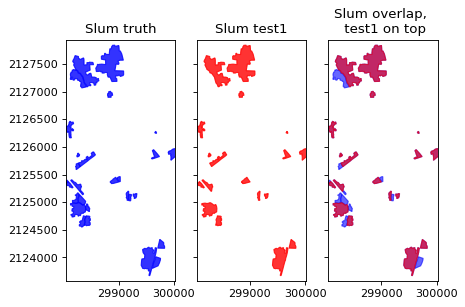

In [2]:
# Python and satsense imports

import matplotlib.pyplot as plt
%matplotlib inline
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# Visualization parameters
RED = '#FF0000'
BLUE = '#0000FF'
YOLK = '#FFE600'
offset = 100
show_verticies = False
alpha = 0.8
alpha_over = 0.6

# Display truth and modified1
_, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
ax1 = shmp(truth_multi, ax1, show_verticies, extent, BLUE, alpha,'Slum truth')
ax2 = shmp(test1_multi, ax2, show_verticies, extent, RED, alpha,'Slum test1')
ax3 = shmp(truth_multi, ax3, show_verticies, extent, BLUE, alpha_over,'')
ax3 = shmp(test1_multi, ax3, show_verticies, extent, RED, alpha_over, 'Slum overlap, \n test1 on top')

plt.show();

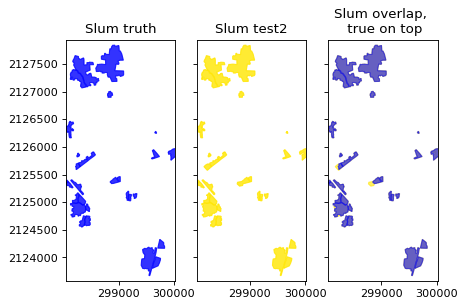

In [3]:
# Display truth and modified2
_, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
ax1 = shmp(truth_multi, ax1, show_verticies, extent, BLUE, alpha,'Slum truth')
ax2 = shmp(test2_multi, ax2, show_verticies, extent, YOLK, alpha,'Slum test2')
ax3 = shmp(test2_multi, ax3, show_verticies, extent, YOLK, alpha_over,'')
ax3 = shmp(truth_multi, ax3, show_verticies, extent, BLUE, alpha_over, 'Slum overlap, \n true on top')

plt.show();

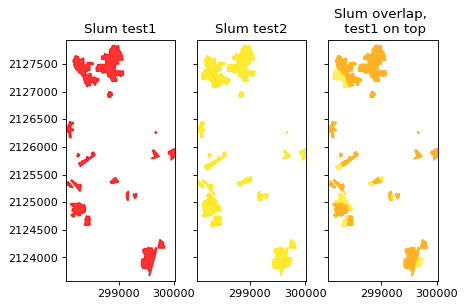

In [4]:
# Display modified1 and modified2
_, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
ax1 = shmp(test1_multi, ax1, show_verticies, extent, RED, alpha,'Slum test1')
ax2 = shmp(test2_multi, ax2, show_verticies, extent, YOLK, alpha,'Slum test2')
ax3 = shmp(test1_multi, ax3, show_verticies, extent, RED, alpha_over,'')
ax3 = shmp(test2_multi, ax3, show_verticies, extent, YOLK, alpha_over, 'Slum overlap, \n test1 on top')

plt.show();

### Jaccard index between all combinaitons of slum multipolygons

In [5]:
# satsense import 
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation

jss_slum1 = jim(truth_multi, test1_multi)
print("The Jaccard Index between multipolygons 'truth' and 'test1': ",jss_slum1)

jss_slum2 = jim(truth_multi, test2_multi)
print("The Jaccard Index between multipolygons 'truth' and 'test2': ",jss_slum2)

jss_test12 = jim(test1_multi, test2_multi)
print("The Jaccard Index between multipolygons 'test1' and 'test2': ",jss_test12)

The Jaccard Index between multipolygons 'truth' and 'test1':  0.8524204098474798
The Jaccard Index between multipolygons 'truth' and 'test2':  0.9358072812173733
The Jaccard Index between multipolygons 'test1' and 'test2':  0.7979681766027388
